In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.ensemble import RandomForestRegressor as rf, GradientBoostingRegressor as gbr, BaggingRegressor as br
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import metrics
pd.set_option("display.max.columns", None)
# pd.set_option("display.max.rows", None)

In [2]:
#storing the data from a file path to the varriable
house_price_train_dataset_path = '/kaggle/input/hse-m-psmsimmo-p-347795-1-apartmentprice/train.csv'
house_price_train_dataset_table = pd.read_csv(house_price_train_dataset_path)
house_price_test_dataset_path = '/kaggle/input/hse-m-psmsimmo-p-347795-1-apartmentprice/test.csv'
house_price_test_dataset_table = pd.read_csv(house_price_test_dataset_path)
(house_price_test_dataset_table. index)


RangeIndex(start=0, stop=10127, step=1)

In [3]:
# #Deleting rows with empty cells in Age, District and Okrug
# house_price_train_dataset_table = house_price_train_dataset_table.dropna(axis=0, subset=['Age', 'District','Okrug'])
# house_price_test_dataset_table = house_price_test_dataset_table.dropna(axis=0, subset=['Age', 'District','Okrug'])
# replacing empty cells with unknown for train and test dataset
house_price_train_dataset_table = house_price_train_dataset_table.fillna("Unknown")
house_price_test_dataset_table = house_price_test_dataset_table.fillna("Unknown")
# converting categorical inputs to dummies for test and train data set
house_price_train_dataset_table = pd.get_dummies(house_price_train_dataset_table, columns=['Balcony','Walls','Age','Lift','District','Okrug'])
house_price_test_dataset_table = pd.get_dummies(house_price_test_dataset_table, columns=['Balcony','Walls','Age','Lift','District','Okrug'])
#Creating missing columns in test data
house_price_test_dataset_table.insert(loc=35, column='District_Внуково',value=0)
house_price_test_dataset_table.shape
# house_price_test_dataset_table.columns.difference(house_price_train_dataset_table.columns).tolist()

(10127, 151)

In [4]:
house_price_train_dataset_table.isnull().sum()
house_price_test_dataset_table.shape
# house_price_test_dataset_table.isnull().sum()
# house_price_test_dataset_table.shape

(10127, 151)

In [5]:
#a view of the first 5 rows of the no missing value train dataset
house_price_train_dataset_table.head()

,Id,Room,Price,Size,Floor,FloorsTotal,Balcony_Unknown,Balcony_балкон,Balcony_лоджия,Walls_Unknown,Walls_блочный,Walls_кирпично-монолитный,Walls_кирпичный,Walls_монолитный,Walls_панельный дом,Age_Unknown,Age_вторичка,Age_новостройка,Lift_Unknown,Lift_грузовой,Lift_пассажирский,District_Unknown,District_Академический,District_Алексеевский,District_Алтуфьевский,District_Арбат,District_Аэропорт,District_Бабушкинский,District_Басманный,District_Беговой,District_Бескудниковский,District_Бибирево,District_Бирюлёво Восточное,District_Бирюлёво Западное,District_Богородский,District_Братеево,District_Бутырский,District_Вешняки,District_Внуково,District_Войковский,District_Восточный,District_Гагаринский,District_Головинский,District_Гольяново,District_Даниловский,District_Дегунино Восточное,District_Дегунино Западное,District_Дмитровский,District_Донской,District_Дорогомилово,District_Жулебино,District_Замоскворечье,District_Зюзино,District_Зябликово,District_Ивановское,District_Измайлово,District_Измайлово Восточное,District_Капотня,District_Коньково,District_Коптево,District_Косино-Ухтомский,District_Котловка,District_Красносельский,District_Крылатский,District_Кузьминки,District_Кунцево,District_Куркино,District_Левобережный,District_Лефортово,District_Лианозово,District_Ломоносовский,District_Лосиноостровский,District_Люблино,District_Марфино,District_Марьина роща,District_Марьино,District_Медведково Южное,District_Метрогородок,District_Мещанский,District_Митино,District_Можайский,District_Молжаниновский,District_Москворечье-Сабурово,District_Нагатино Садовники,District_Нагатинский затон,District_Нагорный,District_Некрасовка,District_Нижегородский,District_Ново-Переделкино,District_Новогиреево,District_Новокосино,District_Обручевский,District_Останкино,District_Отрадное,District_Очаково-Матвеевское,District_Перово,District_Печатники,District_Покровское Стрешнево,District_Преображенский,District_Пресненский,District_Район Вернадского,District_Раменки,District_Ростокино,District_Рязанский,District_Савеловский,District_Свиблово,District_Северное Бутово,District_Северное Измайлово,District_Северное Медведково,District_Северное Орехово Борисово,District_Северное Тушино,District_Северное Чертаново,District_Северный,District_Сокол,District_Соколиная гора,District_Сокольники,District_Солнцево,District_Строгино,District_Таганка,District_Тверской,District_Текстильщики,District_Тимирязевский,District_Тропарево Никулино,District_Тёплый Стан,District_Филевский парк,District_Фили Давыдково,District_Хамовники,District_Ховрино,District_Хорошевский,District_Хорошёво-Мневники,District_Царицыно,District_Центральное Чертаново,District_Черемушки,District_Щукино,District_Южное Бутово,District_Южное Орехово Борисово,District_Южное Тушино,District_Южное Чертаново,District_Южнопортовый,District_Якиманка,District_Ярославский,District_Ясенево,Okrug_Unknown,Okrug_ВАО,Okrug_ЗАО,Okrug_САО,Okrug_СВАО,Okrug_СЗАО,Okrug_ЦАО,Okrug_ЮАО,Okrug_ЮВАО,Okrug_ЮЗАО
0,1,5,210020000.0,198,1,2,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2,2,17630000.0,64,3,8,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,3,5,142400000.0,161,7,7,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,4,5,142520000.0,265,5,5,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0

<AxesSubplot:>

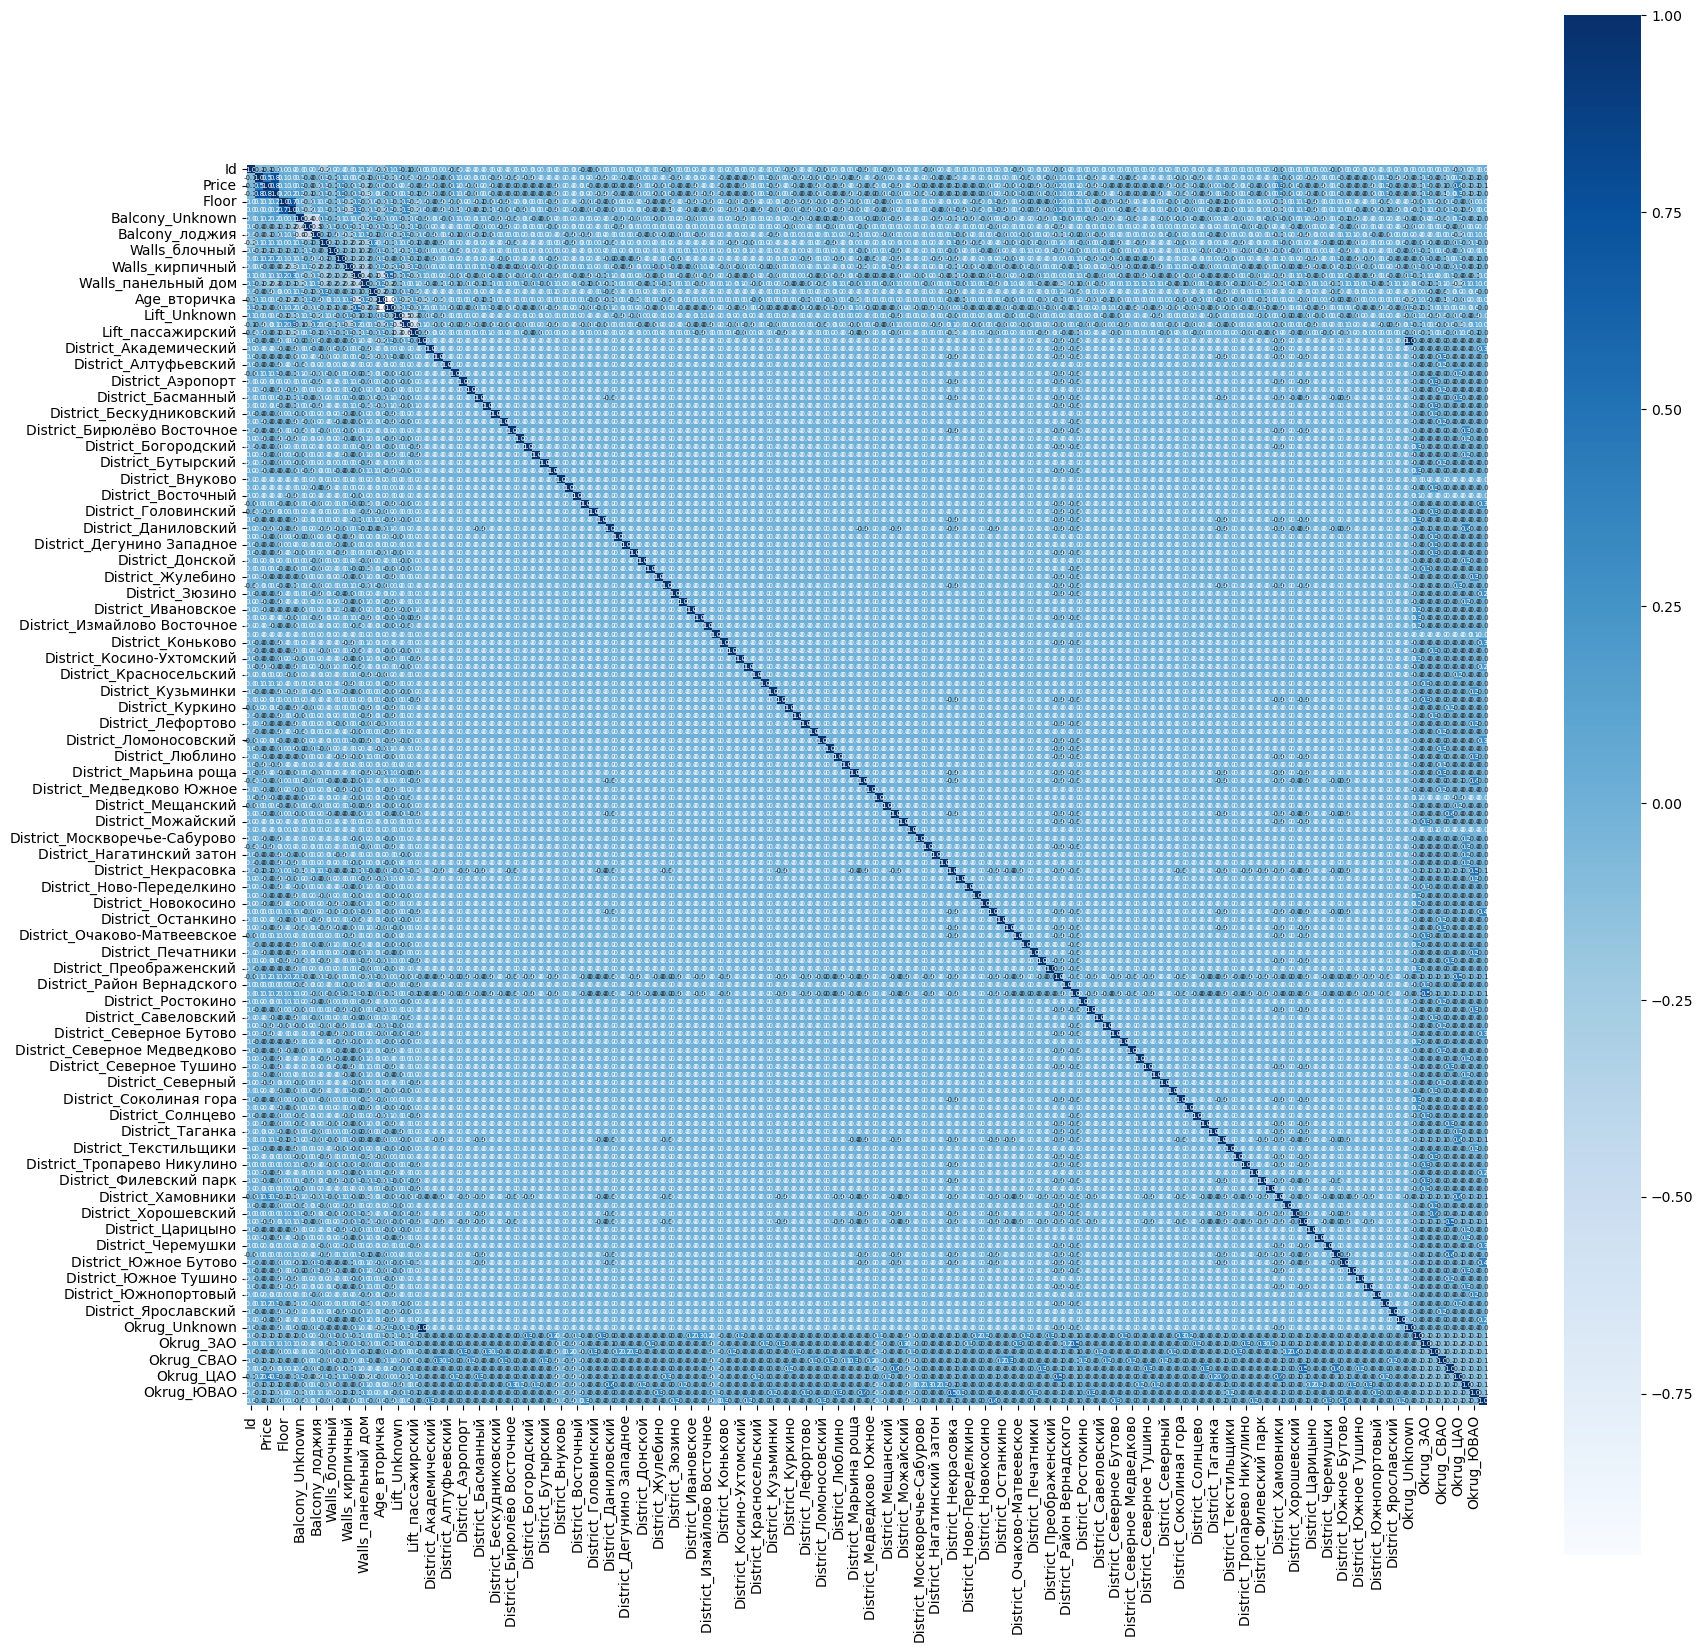

In [6]:
#undferstanding the correlation between the various features in the data(positive or negative)
correlation=house_price_train_dataset_table.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':5}, cmap='Blues')


In [7]:
# spliting the data
x_train=house_price_train_dataset_table.drop(['Price', 'Id'], axis=1)
y_train=house_price_train_dataset_table['Price']
x_test=house_price_test_dataset_table
# X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)
# print(X.shape, X_train.shape, X_test.shape )

In [8]:
# training the data
model = br()
# model = gbr(learning_rate=0.1, random_state=60)
# model = SVR()
# model=rf(n_estimators = 1000, random_state = 42) BEST
# model=XGBRegressor()
model.fit(x_train, y_train)

BaggingRegressor()

In [9]:
# predicting the data
test_data_prediction=model.predict(x_test.drop(['Id'], axis=1))
# checking errors with R Sqaured and mean absolute error
# score_1=metrics.r2_score(Y_train, training_data_prediction)
# score_2=metrics.mean_absolute_error(Y_train, training_data_prediction)
# print('R square error: ', score_1)
# print('mean absolute error: ', score_2)
test_data_prediction=pd.DataFrame(test_data_prediction)
pd.options.display.float_format = '{:.7f}'.format
# test_data_prediction.insert(loc=0, column='Id', value=range(0,len(test_data_prediction)))
# test_data_prediction.set_index('Id')
test_data_prediction.index.name = 'Id'
test_data_prediction.index = test_data_prediction.index + 40509
test_data_prediction.rename(columns = {0:'Price'}, inplace = True)
# pd.set_option('display.max_rows', None)
test_data_prediction.to_csv(f"Submission_file_oct-2021-5.csv")
print(test_data_prediction)




                  Price
Id                     
40509   8801000.0000000
40510 199338000.0000000
40511 104213000.0000000
40512 176252000.0000000
40513  33763000.0000000
...                 ...
50631  12696000.0000000
50632  12187000.0000000
50633   5351000.0000000
50634  10136000.0000000
50635   8530000.0000000

[10127 rows x 1 columns]


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [10]:
# #a view of the train data set
# print(house_price_train_dataset_table)

In [11]:
# #a view of the first 5 rows of the train dataset
# house_price_train_dataset_table.head()

In [12]:
# #a view of the test data set
# print(house_price_test_dataset_table)

In [13]:
# #a view of the first 5 rows of the test dataset
# house_price_test_dataset_table.head()

In [14]:
# #number of attribute cells without inputs
# house_price_train_dataset_table.isnull().sum()

In [15]:
#code to view the different attributes of each feature
# house_price_train_dataset_table['Wall'].value_counts()

In [16]:
# code to select particular columns of a pandas table
# q=house_price_train_dataset_table.iloc[:, [2,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99]]
# print(q)

In [17]:
house_price_test_dataset_table.isnull().sum()

Id             0
Room           0
Size           0
Floor          0
FloorsTotal    0
              ..
Okrug_СЗАО     0
Okrug_ЦАО      0
Okrug_ЮАО      0
Okrug_ЮВАО     0
Okrug_ЮЗАО     0
Length: 151, dtype: int64

In [18]:
house_price_train_dataset_table.isnull().sum()

Id            0
Room          0
Price         0
Size          0
Floor         0
             ..
Okrug_СЗАО    0
Okrug_ЦАО     0
Okrug_ЮАО     0
Okrug_ЮВАО    0
Okrug_ЮЗАО    0
Length: 152, dtype: int64